In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# sns.set_theme(style="darkgrid")

In [104]:
yolo_s = pd.read_fwf('yolov5/runs/train/yolov5s_results/results.txt', header=None, usecols=[8,9,10,11], names=['P','R','mAP@.5','mAP@.5:.95'])
yolo_m = pd.read_fwf('yolov5/runs/train/yolov5m_results/results.txt', header=None, usecols=[8,9,10,11], names=['P','R','mAP@.5','mAP@.5:.95'])
yolo_s['Epoch'] = np.linspace(0,199,200)
yolo_m['Epoch'] = np.linspace(0,199,200)

In [115]:
yolo_m

,P,R,mAP@.5,mAP@.5:.95,Epoch
0,0.03167,0.06847,0.003754,0.000782,0.0
1,0.05833,0.12610,0.011250,0.002199,1.0
2,0.08088,0.13150,0.013780,0.002457,2.0
3,0.18540,0.26490,0.068190,0.012230,3.0
4,0.22050,0.16580,0.075670,0.015020,4.0
...,...,...,...,...,...
195,0.96690,0.95140,0.978600,0.715900,195.0
196,0.96040,0.96030,0.979800,0.712600,196.0
197,0.96180,0.95300,0.978000,0.712300,197.0
198,0.96170,0.95140,0.983100,0.720600,198.0


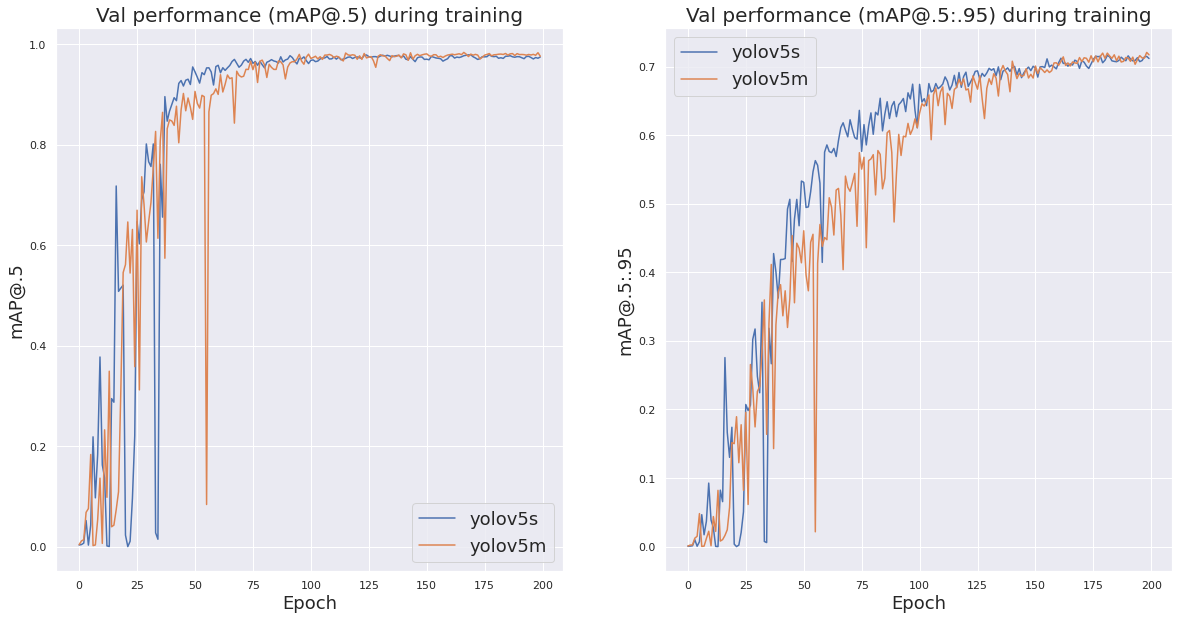

In [113]:
# f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
f, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.lineplot(x='Epoch', y='mAP@.5', data=yolo_s, ax=axs[0], label='yolov5s')
sns.lineplot(x='Epoch', y='mAP@.5', data=yolo_m, ax=axs[0], label='yolov5m')
axs[0].set_xlabel("Epoch", fontsize = 18)
axs[0].set_ylabel("mAP@.5", fontsize = 18)
axs[0].set_title("Val performance (mAP@.5) during training", fontsize = 20)
axs[0].legend(fontsize=18)

sns.lineplot(x='Epoch', y='mAP@.5:.95', data=yolo_s, ax=axs[1], label='yolov5s')
sns.lineplot(x='Epoch', y='mAP@.5:.95', data=yolo_m, ax=axs[1], label='yolov5m')
axs[1].set_xlabel("Epoch", fontsize = 18)
axs[1].set_ylabel("mAP@.5:.95", fontsize = 18)
axs[1].set_title("Val performance (mAP@.5:.95) during training", fontsize = 20)
axs[1].legend(fontsize=18)

In [114]:
f.savefig("map.png") 

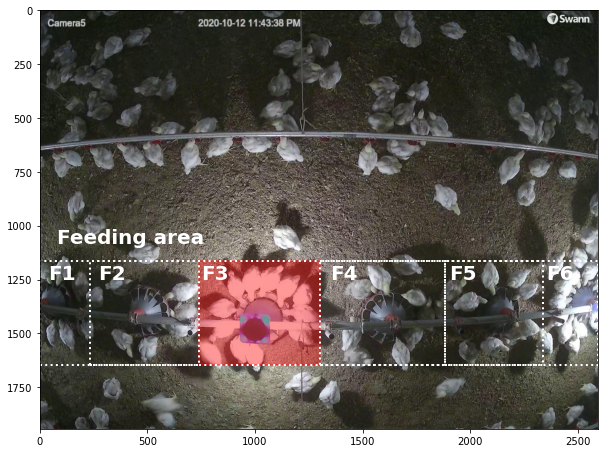

In [2]:
# Plot rectangle on test image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('yolov5/yolov5-3/valid/images/valid_1.jpg')

# Create figure and axes
fig, ax = plt.subplots(figsize=(10,10))

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((738, 1645), 1302-738, 1165-1645, linewidth=2, color='r', alpha=0.4)
rect2 = patches.Rectangle((1302, 1645), 1883-1302, 1165-1645, linewidth=2, edgecolor='w', facecolor='none', linestyle=':')
rect3 = patches.Rectangle((0, 1645), 2592, 1165-1645, linewidth=2, edgecolor='w', facecolor='none', linestyle=':')
rect4 = patches.Rectangle((233, 1645), 738-233, 1165-1645, linewidth=2, edgecolor='w', facecolor='none', linestyle=':')
rect5 = patches.Rectangle((1883, 1645), 2339-1883, 1165-1645, linewidth=2, edgecolor='w', facecolor='none', linestyle=':')

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)

plt.annotate('F1', (40, 1250), c='w', fontsize=20, weight='bold')
plt.annotate('F2', (270, 1250), c='w', fontsize=20, weight='bold')
plt.annotate('F3', (750, 1250), c='w', fontsize=20, weight='bold')
plt.annotate('F4', (1350, 1250), c='w', fontsize=20, weight='bold')
plt.annotate('F5', (1900, 1250), c='w', fontsize=20, weight='bold')
plt.annotate('F6', (2350, 1250), c='w', fontsize=20, weight='bold')
plt.annotate('Feeding area', (80, 1080), c='w', fontsize=20, weight='bold')

# plt.show()
plt.savefig('feeding_area_annotation.png',bbox_inches='tight')

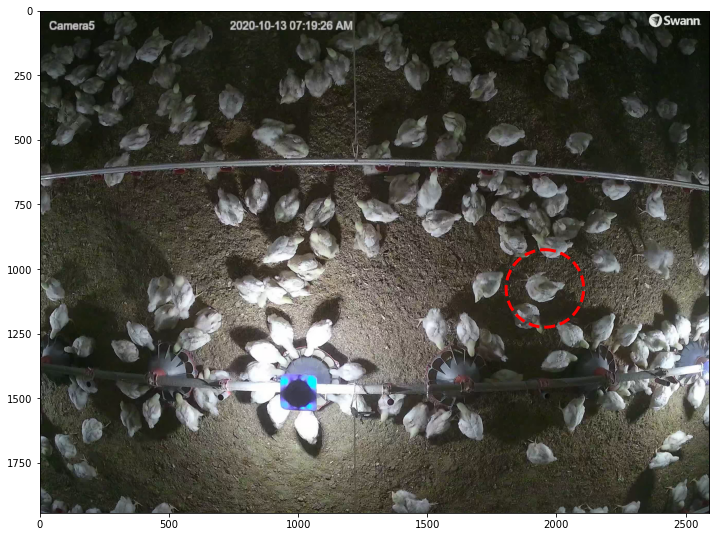

In [8]:
import cv2

vidcap = cv2.VideoCapture('yolov5/videos/20201013_0700.avi')
success, frame = vidcap.read()
b,g,r = cv2.split(frame)
frame_rgb = cv2.merge((r,g,b))

# # Create figure and axes
fig, ax = plt.subplots(figsize=(12,12))

# # Display the image
ax.imshow(frame_rgb)

rect = patches.Circle((1955, 1075), radius=150, linewidth=3, color='r', ls='--', fill=False)
ax.add_patch(rect)

vidcap.release()
cv2.destroyAllWindows()
plt.savefig('cluster_threshold.png',bbox_inches='tight')